In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# Correlation---> + corr & - corr
correlation= gold_data.corr()

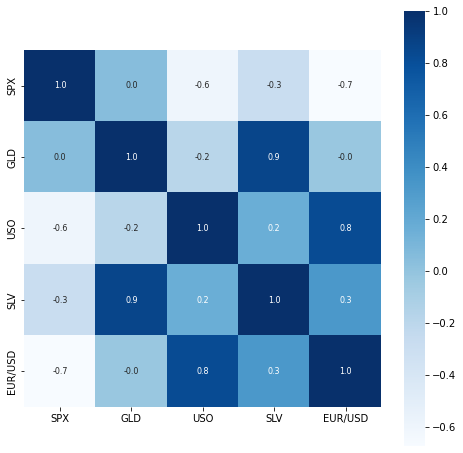

In [21]:
# Heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


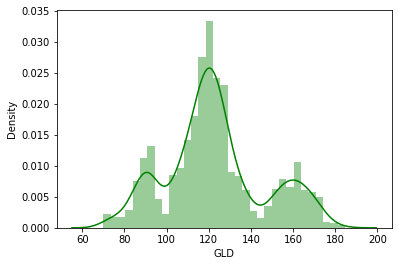

In [12]:
# Checking the distribution of GlD price
sns.distplot(gold_data['GLD'], color='green')

In [13]:
# Splitting the Features and Target
X= gold_data.drop(['Date','GLD'], axis=1)
Y= gold_data['GLD']

In [14]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
# Splitting into Training & Test data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [16]:
# Model training using Random Forest Regressor
model= RandomForestRegressor(n_estimators= 100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [23]:
# Model evaluation
# Prediction on test data
test_data_pred= model.predict(X_test)
print(test_data_pred)

[168.64879956  82.24299976 115.93990024 127.61800083 120.91380089
 154.63429761 150.20399822 125.97740032 117.48219901 125.88280123
 116.54340114 171.93000073 141.2420989  167.90999917 115.16700013
 117.27090045 138.21050369 170.3668011  159.61170308 158.69890019
 155.09799995 125.06730062 175.55120035 157.00690339 125.17460029
  93.71039951  76.96650023 120.70530002 119.01149917 167.4383998
  88.18750109 125.17879989  91.21220059 117.66510028 121.15739884
 135.66370091 115.54280094 115.01870074 147.3384003  107.05850046
 104.57040271  87.28749797 126.52030024 117.89639961 154.73479859
 119.67880005 108.32450004 108.112298    93.22860066 127.1883975
  75.72540024 113.6894993  121.25560004 111.27309909 118.83369891
 120.49819944 158.17369944 168.29150146 147.09239667  85.90329874
  94.16800028  86.64639875  90.43880046 118.99840049 126.43740035
 127.74250011 170.41800027 122.44369948 117.06919893  98.78070025
 168.40820248 143.02069842 131.89810191 121.19840182 120.74369941
 119.6693006

In [18]:
# R Square Error
error_score= metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.9891760057475707


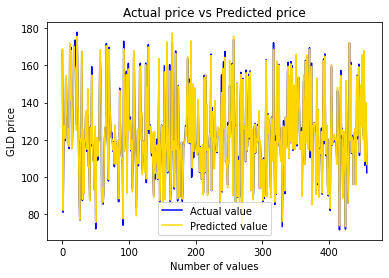

In [29]:
# Compare the Actual values and Predicted values in a plot
Y_test= list(Y_test)

plt.plot(Y_test, color= 'blue', label= 'Actual value')
plt.plot(test_data_pred, color= 'gold', label= 'Predicted value')
plt.title("Actual price vs Predicted price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show() 